## O que veremos neste Jupyter Notebook?

* Tipos de gráficos
  * Gráfico de linha
  * Gráfico de barra
  * Gráfico espacial
* Uso do shapefile
  * Adicionar shapefile ao mapa
  * Uso do shapefile para mascarar o dado

## O que vou aprender no fim deste Jupyter Notebook?

**Noções** sobre geração de gráficos e uso de shapefile.

## Leitura recomendada

* [https://matplotlib.org/stable/tutorials/text/mathtext.html](https://matplotlib.org/stable/tutorials/text/mathtext.html)

## Importação de bibliotecas

In [40]:
import xarray as xr
import proplot as pplt
#import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Tipos de gráficos

Uso da biblioteca proplot.

[https://proplot.readthedocs.io/en/stable/index.html](https://proplot.readthedocs.io/en/stable/index.html)

### Gráficos de linha

[https://proplot.readthedocs.io/en/stable/1dplots.html](https://proplot.readthedocs.io/en/stable/1dplots.html)

Exemplo 1:

In [41]:
ds = xr.open_dataset("../dados/serie.chuva.202210.nc")

ds

<xarray.Dataset>
Dimensions:  (time: 31, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 2022-10-01 2022-10-02 ... 2022-10-31
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0
Data variables:
    prec     (time, lat, lon) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Wed Nov 23 08:25:38 2022: cdo -fldmean -mergetime M...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

In [42]:
prec = ds.prec[:,0,0]

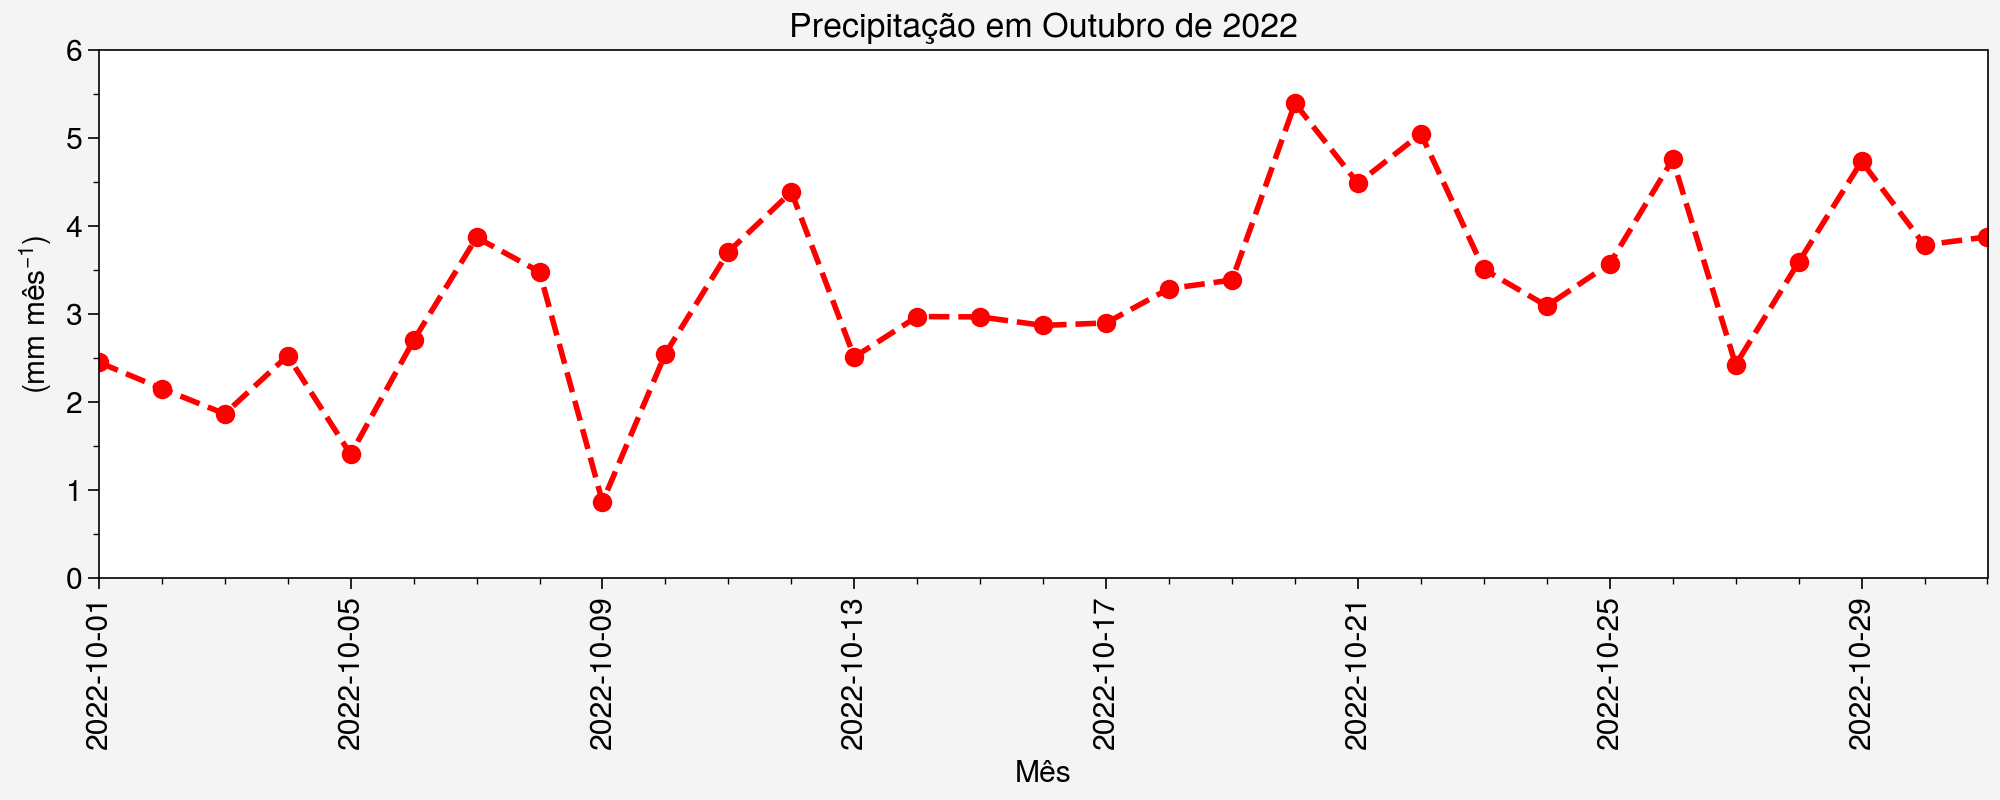

In [43]:
# Cria alguns objetos que serão utilizados para a formatação da figura.
fig = pplt.figure(figsize=(10, 4)) # largura e altura da figura.
ax = fig.subplot()

# Formatação da figura.
ax.format(title='Precipitação em Outubro de 2022', xlabel='Mês', ylabel=r'(mm mês$^{-1}$)', grid=False, 
          large='17px', small='15px', ylim=(0, 6), ylocator=1, yminorlocator=0.5)

# Plot do gráfico.
ax.plot(prec, linewidth=2, linestyle='--', color='red', marker='o')

# Salva a figura.
fig.save('ex01_linha.jpg', dpi=300, bbox_inches='tight')

### Gráficos de barras

* [https://proplot.readthedocs.io/en/stable/1dplots.html#Bar-plots-and-area-plots](https://proplot.readthedocs.io/en/stable/1dplots.html#Bar-plots-and-area-plots)
* [https://proplot.readthedocs.io/en/stable/1dplots.html#Negative-and-positive-colors](https://proplot.readthedocs.io/en/stable/1dplots.html#Negative-and-positive-colors)

Exemplo 1:

In [44]:
ds = xr.open_dataset("../dados/serie.chuva.202210.nc")

ds

<xarray.Dataset>
Dimensions:  (time: 31, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 2022-10-01 2022-10-02 ... 2022-10-31
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0
Data variables:
    prec     (time, lat, lon) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Wed Nov 23 08:25:38 2022: cdo -fldmean -mergetime M...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

In [45]:
prec = ds.prec[:,0,0]

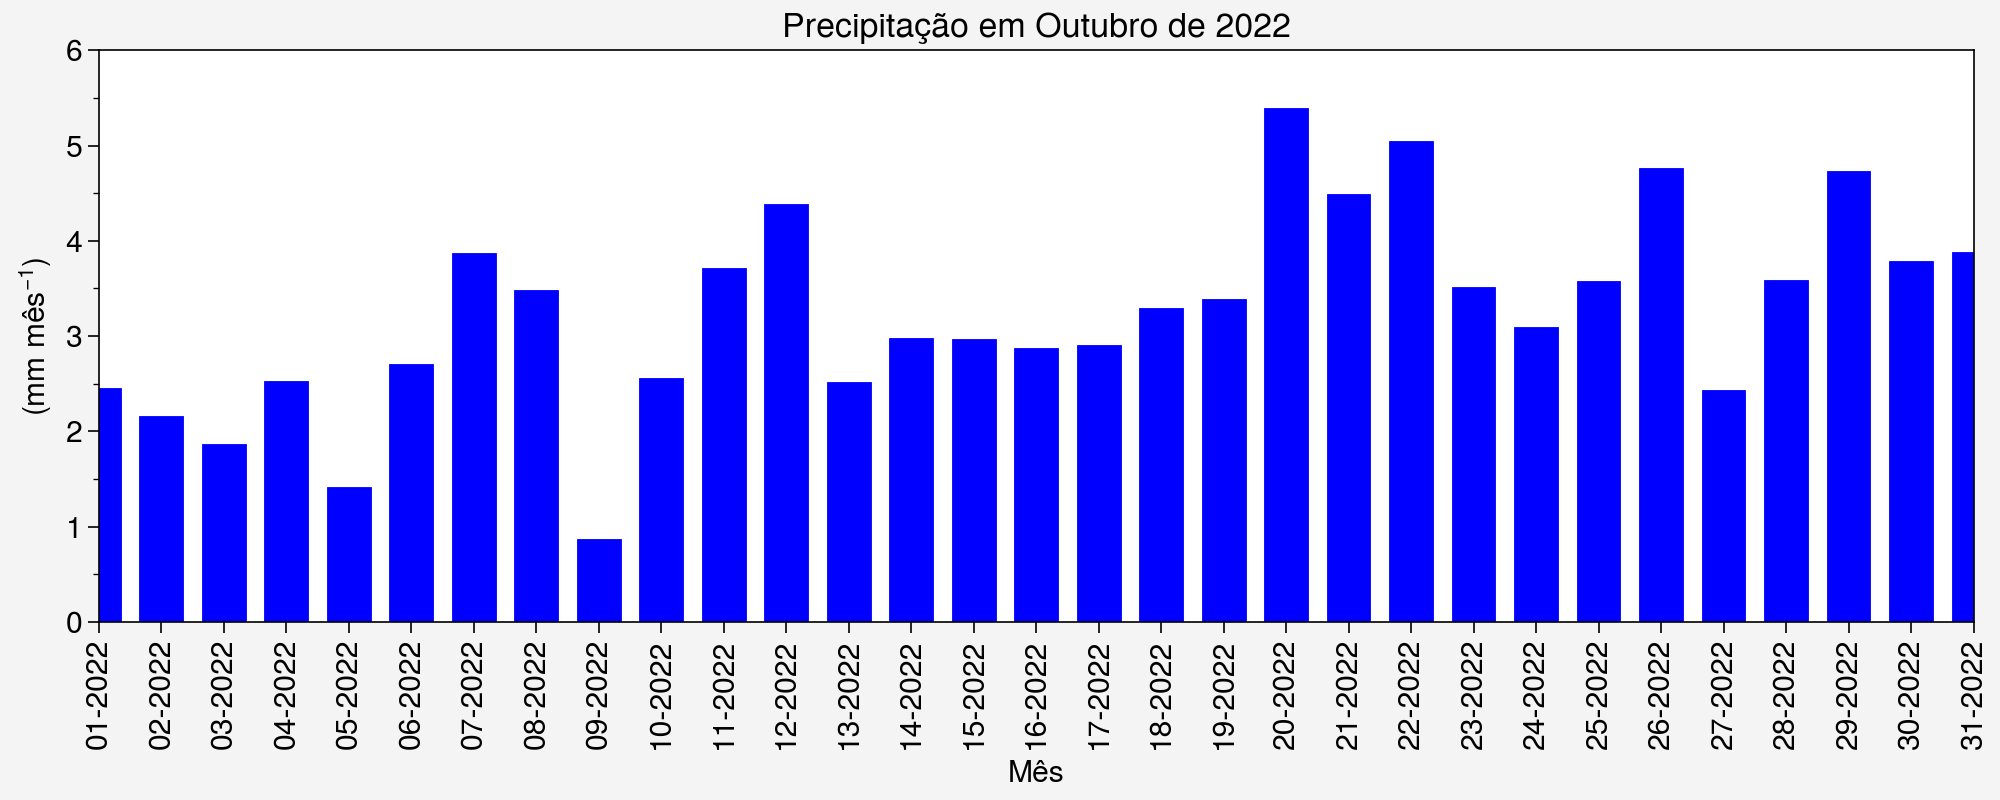

In [46]:
import numpy as np

# Cria alguns objetos que serão utilizados para a formatação da figura.
fig = pplt.figure(figsize=(10, 4)) # largura e altura da figura.
ax = fig.subplot()

# Formatação da figura.
ax.format(title='Precipitação em Outubro de 2022', xlabel='Mês', ylabel=r'(mm mês$^{-1}$)', grid=False, 
          large='17px', small='15px', ylim=(0, 6), ylocator=1, yminorlocator=0.5, 
          xlim=(np.datetime64('2022-10-01'), np.datetime64('2022-10-31')), 
          xlocator='day', xformatter='%d-%Y', xminorlocator='day')

# Plot do gráfico.
ax.bar(prec.time, prec, color='blue', width=0.7)

# Salva a figura.
fig.save('ex01_barra.jpg', dpi=300)

### Gráficos espaciais

Leitura recomendada:

* [https://proplot.readthedocs.io/en/stable/2dplots.html#](https://proplot.readthedocs.io/en/stable/2dplots.html#)

Importa bibliotecas

In [47]:
import xarray as xr
import proplot as pplt

Abertura do arquivo

In [48]:
ds = xr.open_dataset("../dados/ERA5_Superficie_2021.nc")

In [49]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

Selecionar a temperatura a 2 metros (Kelvin) e converte para Celsius (°C).

In [50]:
tc = ds.t2m - 273.15 # Converte de Kelvin para Celsius.

tc.attrs['units'] = '°C'

In [51]:
tc

<xarray.DataArray 't2m' (time: 12, latitude: 201, longitude: 281)>
array([[[25.607025 , 25.531067 , 25.450714 , ..., 25.531067 ,
         25.403992 , 25.294434 ],
        [25.574158 , 25.454376 , 25.343353 , ..., 25.575623 ,
         25.47995  , 25.380615 ],
        [25.546417 , 25.417877 , 25.30246  , ..., 25.693207 ,
         25.638428 , 25.550781 ],
        ...,
        [15.984314 , 15.936859 , 15.892303 , ..., 16.949158 ,
         16.935272 , 16.927246 ],
        [15.749878 , 15.700928 , 15.6753845, ..., 16.765106 ,
         16.747559 , 16.74173  ],
        [15.481812 , 15.460632 , 15.468658 , ..., 16.595642 ,
         16.559845 , 16.544525 ]],

       [[25.888947 , 25.760406 , 25.593872 , ..., 23.957123 ,
         23.949799 , 23.94397  ],
        [25.561005 , 25.430267 , 25.332397 , ..., 24.166718 ,
         24.1156   , 24.080536 ],
        [25.390839 , 25.29953  , 25.225037 , ..., 24.46106  ,
         24.379272 , 24.29309  ],
...
        [12.490936 , 12.524536 , 12.522339 , ..., 13.489349 ,
         13.495209 , 13.506866 ],
        [12.33316  , 12.352142 , 12.346313 , ..., 13.281921 ,
         13.270233 , 13.278259 ],
        [12.168823 , 12.168823 , 12.153503 , ..., 13.0672   ,
         13.010956 , 13.020447 ]],

       [[25.936432 , 25.815186 , 25.674957 , ..., 26.993286 ,
         27.084595 , 27.174408 ],
        [25.65744  , 25.498932 , 25.385712 , ..., 27.04953  ,
         27.155426 , 27.248932 ],
        [25.44049  , 25.264496 , 25.166626 , ..., 27.10431  ,
         27.217499 , 27.31903  ],
        ...,
        [14.434448 , 14.403046 , 14.365814 , ..., 15.546082 ,
         15.549744 , 15.528564 ],
        [14.233612 , 14.190521 , 14.167145 , ..., 15.242981 ,
         15.270752 , 15.286072 ],
        [14.014496 , 13.991119 , 13.985291 , ..., 14.928925 ,
         14.926727 , 14.932587 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Attributes:
    units:    °C

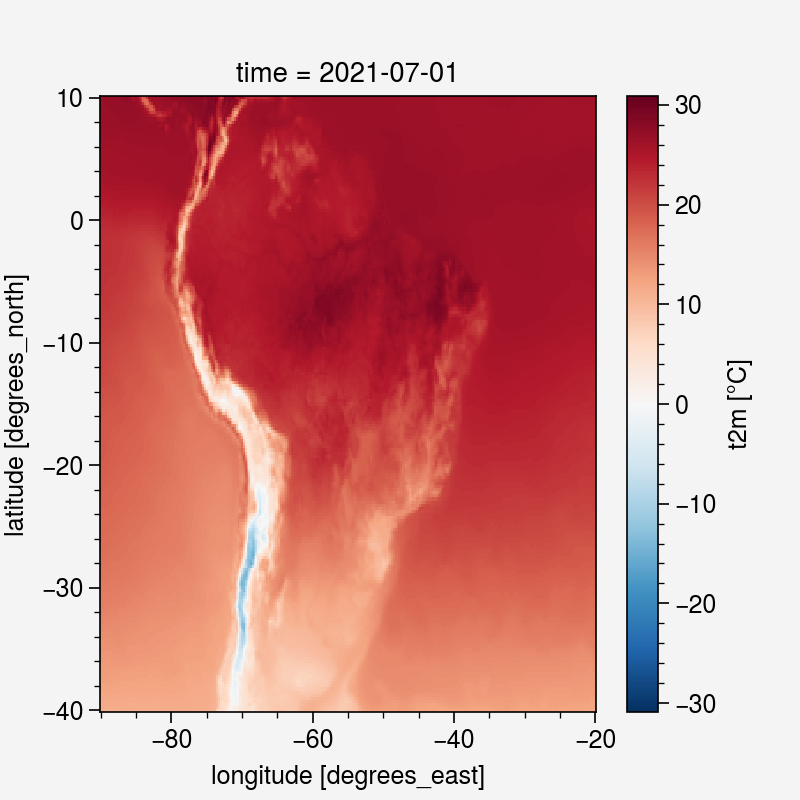

In [52]:
tc.sel(time='2021-07').plot()

Gráfico com perfumaria

Criando variáveis para gerar o mapa de temperatura.

In [53]:
temp = tc.sel(time='2021-10') # temp(1, 201, 281) = temp(time, latitude, longitude)
lat = temp['latitude']
lon = temp['longitude']

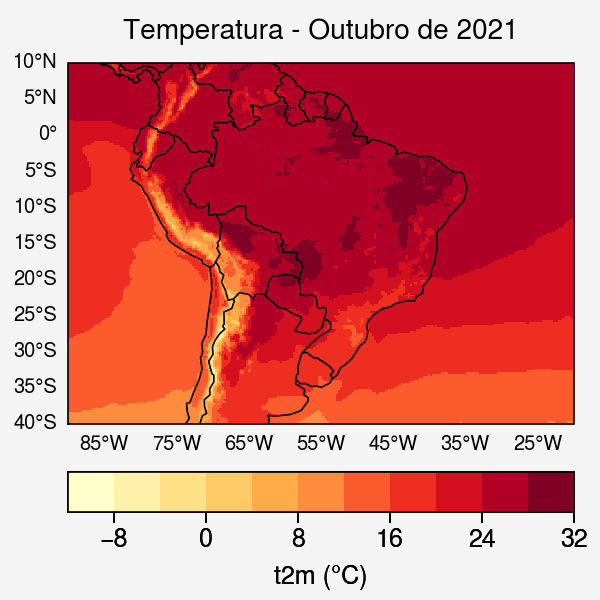

In [54]:
fig, ax = pplt.subplots(proj='pcarree', figsize=(3, 3))

# Formatação do mapa.
ax.format(coast=True, borders=True, labels=True, grid=False,
          latlines=5, lonlines=5, title='Temperatura - Outubro de 2021', 
          latlim=(-40, 10), lonlim=(-90,-20), small='10px', large='14px')
   
# Plot da figura.
# contourf ou pcolormesh.
# Mapa de cores: https://proplot.readthedocs.io/en/stable/colormaps.html
mapa = ax.pcolormesh(lon, lat, temp[0,:,:], colorbar='b', cmap='YlOrRd')

# Salva a figura.
fig.save('ex01_mapa.jpg', dpi=300, bbox_inches='tight')

## Uso de arquivo shapefile

### Exemplo 1: Mostrar a divisão dos estados brasileiros

Importa bibliotecas

In [55]:
import xarray as xr
import proplot as pplt

Abertura do arquivo

In [56]:
ds = xr.open_dataset("../dados/ERA5_Superficie_2021.nc")

In [57]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

Selecionar a temperatura a 2 metros (Kelvin) e converte para Celsius (°C).

In [58]:
tc = ds.t2m - 273.15 # Converte de Kelvin para Celsius.

tc.attrs['units'] = '°C'

In [59]:
tc

<xarray.DataArray 't2m' (time: 12, latitude: 201, longitude: 281)>
array([[[25.607025 , 25.531067 , 25.450714 , ..., 25.531067 ,
         25.403992 , 25.294434 ],
        [25.574158 , 25.454376 , 25.343353 , ..., 25.575623 ,
         25.47995  , 25.380615 ],
        [25.546417 , 25.417877 , 25.30246  , ..., 25.693207 ,
         25.638428 , 25.550781 ],
        ...,
        [15.984314 , 15.936859 , 15.892303 , ..., 16.949158 ,
         16.935272 , 16.927246 ],
        [15.749878 , 15.700928 , 15.6753845, ..., 16.765106 ,
         16.747559 , 16.74173  ],
        [15.481812 , 15.460632 , 15.468658 , ..., 16.595642 ,
         16.559845 , 16.544525 ]],

       [[25.888947 , 25.760406 , 25.593872 , ..., 23.957123 ,
         23.949799 , 23.94397  ],
        [25.561005 , 25.430267 , 25.332397 , ..., 24.166718 ,
         24.1156   , 24.080536 ],
        [25.390839 , 25.29953  , 25.225037 , ..., 24.46106  ,
         24.379272 , 24.29309  ],
...
        [12.490936 , 12.524536 , 12.522339 , ..., 13.489349 ,
         13.495209 , 13.506866 ],
        [12.33316  , 12.352142 , 12.346313 , ..., 13.281921 ,
         13.270233 , 13.278259 ],
        [12.168823 , 12.168823 , 12.153503 , ..., 13.0672   ,
         13.010956 , 13.020447 ]],

       [[25.936432 , 25.815186 , 25.674957 , ..., 26.993286 ,
         27.084595 , 27.174408 ],
        [25.65744  , 25.498932 , 25.385712 , ..., 27.04953  ,
         27.155426 , 27.248932 ],
        [25.44049  , 25.264496 , 25.166626 , ..., 27.10431  ,
         27.217499 , 27.31903  ],
        ...,
        [14.434448 , 14.403046 , 14.365814 , ..., 15.546082 ,
         15.549744 , 15.528564 ],
        [14.233612 , 14.190521 , 14.167145 , ..., 15.242981 ,
         15.270752 , 15.286072 ],
        [14.014496 , 13.991119 , 13.985291 , ..., 14.928925 ,
         14.926727 , 14.932587 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Attributes:
    units:    °C

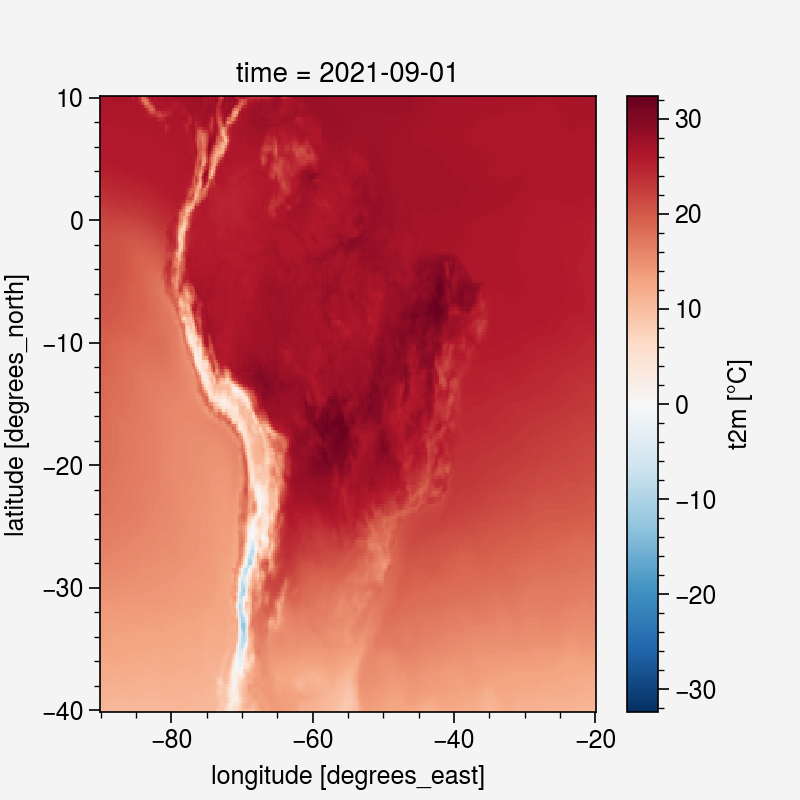

In [60]:
tc[8,:,:].plot()

Criando variáveis para gerar o mapa de temperatura.

In [61]:
temp = tc.sel(time='2021-07')
lat = temp.latitude
lon = temp.longitude

Abertura do arquivo shapefile que será usado no mapa de temperatura para mostrar os Estados do Brasil

In [62]:
import cartopy.crs as crs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

EstadosBrasil = ShapelyFeature(Reader('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp').geometries(), 
                                      crs.PlateCarree(), facecolor='none')

Geração do gráfico

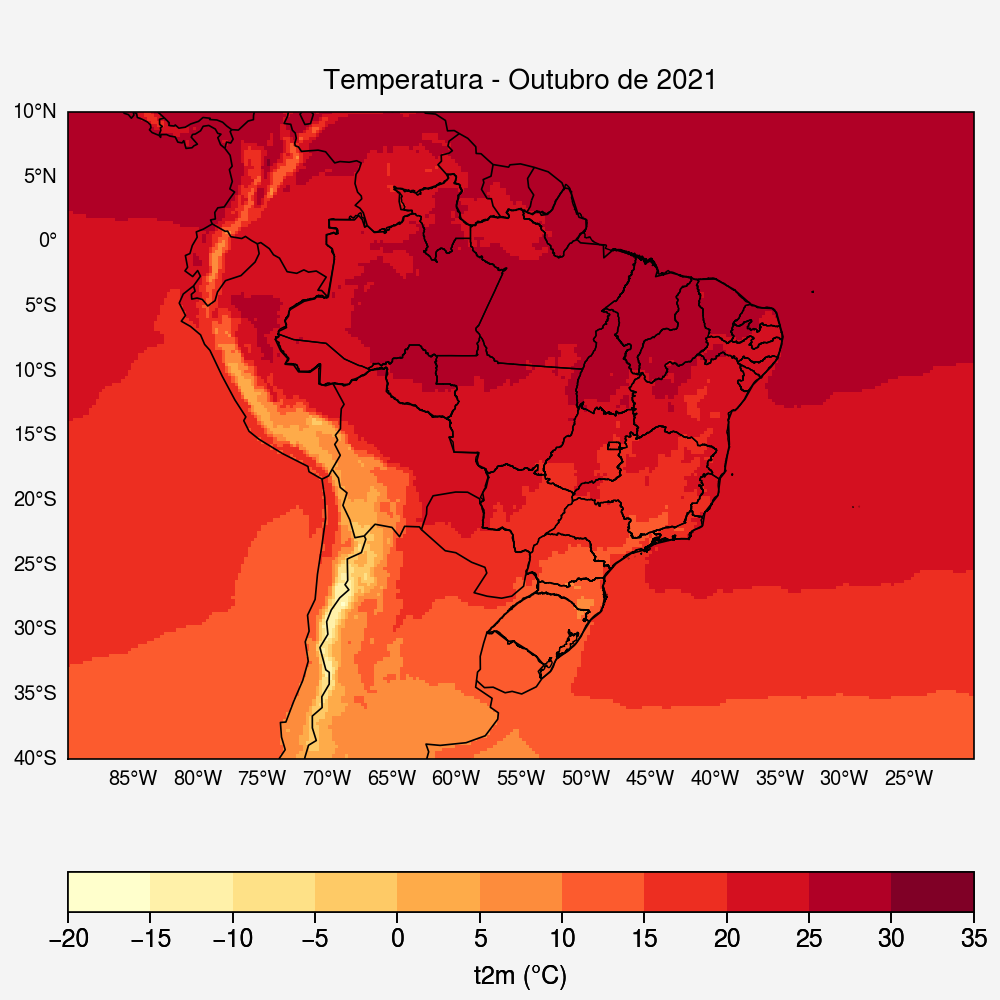

In [79]:
fig, ax = pplt.subplots(proj='pcarree', figsize=(5, 5))

# Formatação do mapa.
ax.format(coast=True, borders=True, labels=True, grid=False,
          latlines=5, lonlines=5, title='Temperatura - Outubro de 2021', 
          latlim=(-40, 10), lonlim=(-90,-20), small='10px', large='14px')
   
# Plot da figura.
# contourf ou pcolormesh.
# Mapa de cores: https://proplot.readthedocs.io/en/stable/colormaps.html
ax.pcolormesh(lon, lat, temp[0,:,:], colorbar='b', cmap='YlOrRd')

# Adiciona o contorno dos estados brasileiros.
ax.add_feature(EstadosBrasil, linewidth=0.5, edgecolor="k")

# Salva a figura.
fig.save('ex01_shapefile.jpg', dpi=300, bbox_inches='tight')

### Exemplo 2: Criação e uso de máscara para mostrar informações apenas no Brasil

Uso do shapefile para mascarar o dado

In [64]:
import xarray as xr
import proplot as pplt
import salem

In [65]:
ds = xr.open_dataset("../dados/ERA5_Superficie_2021.nc")

In [66]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 201, time: 12)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-28 14:17:55 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

Selecionar a temperatura a 2 metros (Kelvin) e converte para Celsius (°C).

In [67]:
tc = ds.t2m - 273.15 # Converte de Kelvin para Celsius.

tc.attrs['units'] = '°C'

In [68]:
tc

<xarray.DataArray 't2m' (time: 12, latitude: 201, longitude: 281)>
array([[[25.607025 , 25.531067 , 25.450714 , ..., 25.531067 ,
         25.403992 , 25.294434 ],
        [25.574158 , 25.454376 , 25.343353 , ..., 25.575623 ,
         25.47995  , 25.380615 ],
        [25.546417 , 25.417877 , 25.30246  , ..., 25.693207 ,
         25.638428 , 25.550781 ],
        ...,
        [15.984314 , 15.936859 , 15.892303 , ..., 16.949158 ,
         16.935272 , 16.927246 ],
        [15.749878 , 15.700928 , 15.6753845, ..., 16.765106 ,
         16.747559 , 16.74173  ],
        [15.481812 , 15.460632 , 15.468658 , ..., 16.595642 ,
         16.559845 , 16.544525 ]],

       [[25.888947 , 25.760406 , 25.593872 , ..., 23.957123 ,
         23.949799 , 23.94397  ],
        [25.561005 , 25.430267 , 25.332397 , ..., 24.166718 ,
         24.1156   , 24.080536 ],
        [25.390839 , 25.29953  , 25.225037 , ..., 24.46106  ,
         24.379272 , 24.29309  ],
...
        [12.490936 , 12.524536 , 12.522339 , ..., 13.489349 ,
         13.495209 , 13.506866 ],
        [12.33316  , 12.352142 , 12.346313 , ..., 13.281921 ,
         13.270233 , 13.278259 ],
        [12.168823 , 12.168823 , 12.153503 , ..., 13.0672   ,
         13.010956 , 13.020447 ]],

       [[25.936432 , 25.815186 , 25.674957 , ..., 26.993286 ,
         27.084595 , 27.174408 ],
        [25.65744  , 25.498932 , 25.385712 , ..., 27.04953  ,
         27.155426 , 27.248932 ],
        [25.44049  , 25.264496 , 25.166626 , ..., 27.10431  ,
         27.217499 , 27.31903  ],
        ...,
        [14.434448 , 14.403046 , 14.365814 , ..., 15.546082 ,
         15.549744 , 15.528564 ],
        [14.233612 , 14.190521 , 14.167145 , ..., 15.242981 ,
         15.270752 , 15.286072 ],
        [14.014496 , 13.991119 , 13.985291 , ..., 14.928925 ,
         14.926727 , 14.932587 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Attributes:
    units:    °C

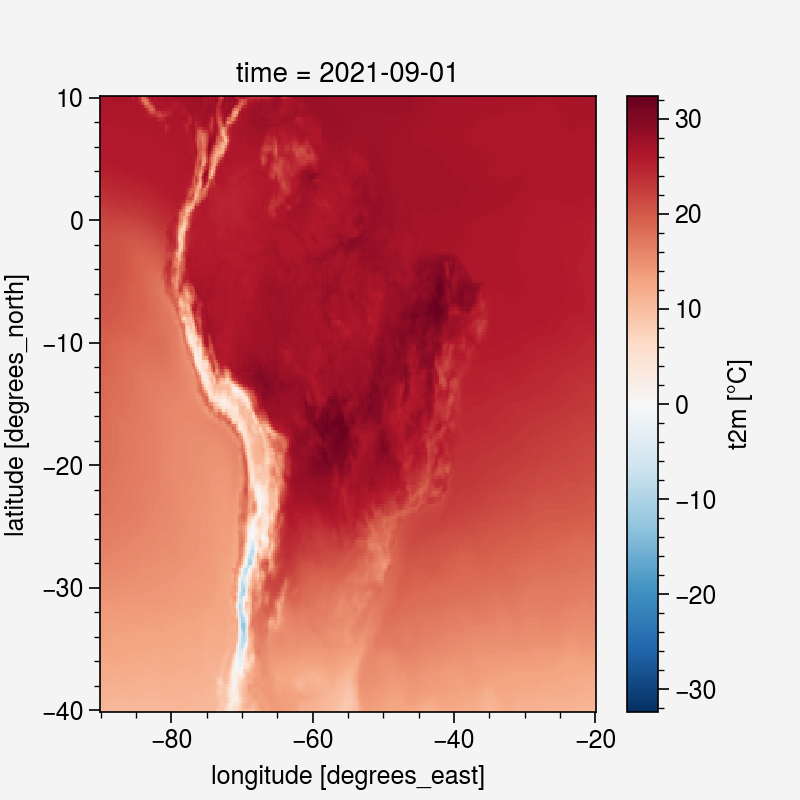

In [69]:
tc[8,:,:].plot()

Criando variáveis para gerar o mapa de temperatura.

In [70]:
temp = tc.sel(time='2021-07')

Abertura do arquivo shapefile que será usado no mapa de temperatura para **mostrar os Estados do Brasil**

In [71]:
import cartopy.crs as crs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

EstadosBrasil = ShapelyFeature(Reader('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp').geometries(), 
                                      crs.PlateCarree(), facecolor='none')

Recorta o dado no mesmo domínio do shapefile

In [72]:
shp = salem.read_shapefile('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp')

In [73]:
shp

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry,min_x,max_x,min_y,max_y
0,RONDÔNIA,NORTE,11,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...",-66.810253,-59.774357,-13.693700,-7.975868
1,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381...",-73.990450,-66.623754,-11.145561,-7.111824
2,AMAZONAS,NORTE,13,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125...",-73.801558,-56.097558,-9.818046,2.246631
3,RORAIMA,NORTE,14,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045...",-64.825254,-58.886884,-1.580633,5.271841
4,PARÁ,NORTE,15,"MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...",-58.898328,-46.060947,-9.841153,2.591027
5,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1...",-54.876250,-49.876217,-1.236176,4.436746
6,TOCANTINS,NORTE,17,"POLYGON ((-48.35878 -5.17008, -48.35617 -5.171...",-50.742064,-45.696671,-13.467713,-5.168381
7,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ...",-48.755151,-41.795884,-10.261765,-1.043977
8,PIAUÍ,NORDESTE,22,"POLYGON ((-41.74605 -2.80350, -41.74241 -2.805...",-45.994295,-40.370510,-10.928756,-2.739309
9,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788...",-41.423518,-37.253291,-7.858182,-2.784231


In [110]:
regiao_interesse = shp.loc[(shp["NM_REGIAO"] == "NORTE") | (shp["NM_REGIAO"] == "NORDESTE") | (shp["NM_REGIAO"] == "SUDESTE") | (shp["NM_REGIAO"] == "SUL" ) | (shp["NM_REGIAO"] == "CENTRO-OESTE")]
#regiao_interesse = shp.loc[shp["NM_ESTADO"] == "AMAZONAS"]
#regiao_interesse = shp.loc[(shp["NM_ESTADO"] == "SÃO PAULO") | (shp["NM_ESTADO"] == "TOCANTINS")]
#regiao_interesse = shp.loc[shp["NM_REGIAO"] == "SUDESTE"]
#regiao_interesse = shp.loc[shp["NM_REGIAO"] == "NORTE"]

In [111]:
dado_mask = temp.salem.roi(shape=regiao_interesse)
lat = dado_mask.latitude
lon = dado_mask.longitude

In [112]:
dado_mask

<xarray.DataArray 't2m' (time: 1, latitude: 201, longitude: 281)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2021-07-01
Attributes:
    units:       °C
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

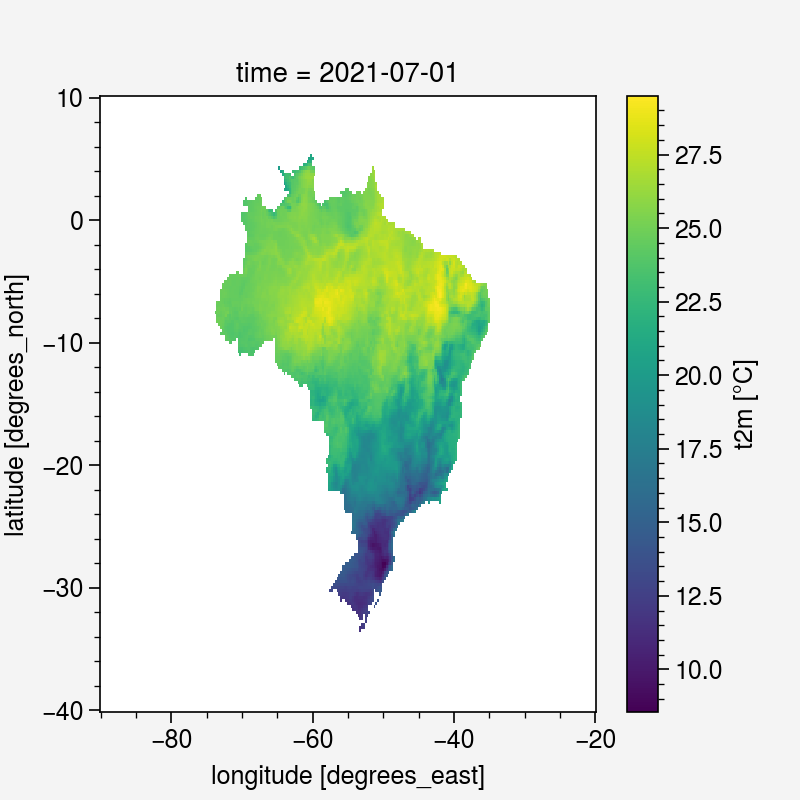

In [113]:
dado_mask[0,:,:].plot()

Gerção do gráfico

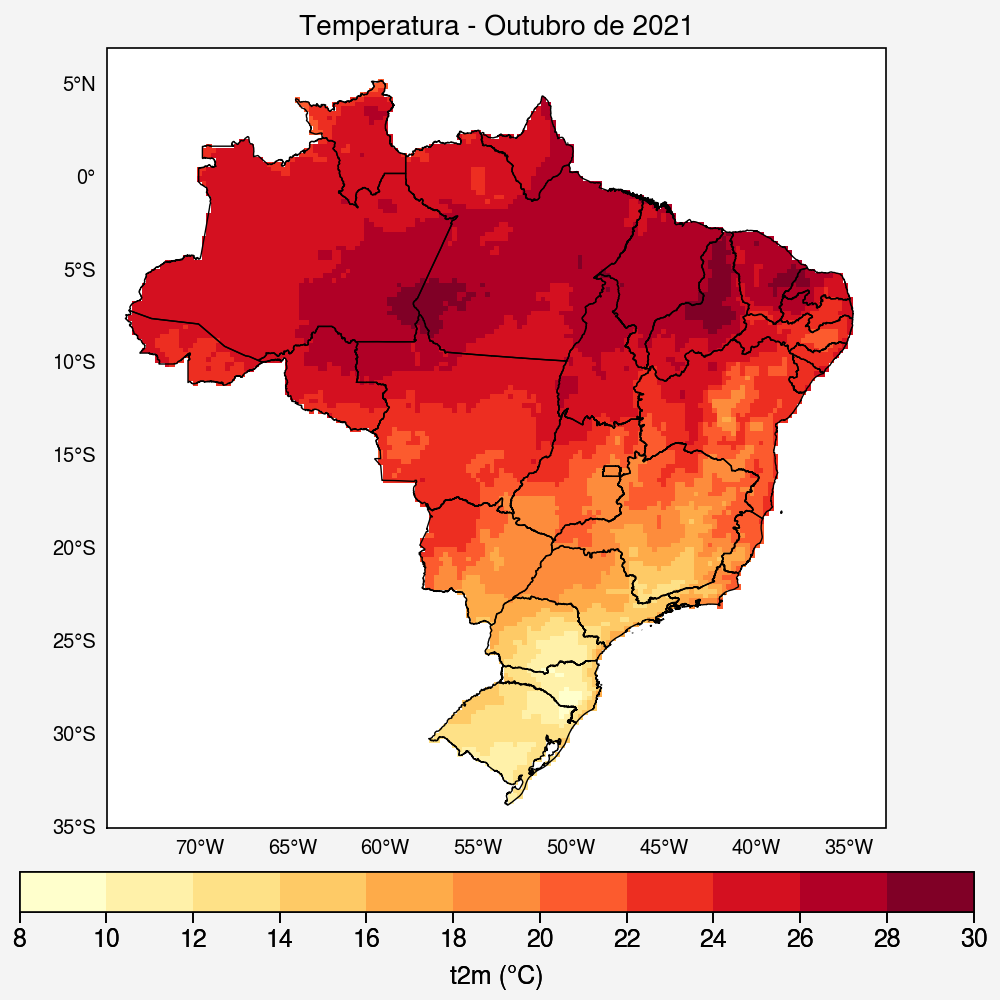

In [114]:
fig, ax = pplt.subplots(proj='pcarree', figsize=(5, 5))

# Formatação do mapa.
ax.format(coast=False, borders=False, labels=True, grid=False,
          latlines=5, lonlines=5, title='Temperatura - Outubro de 2021', 
          latlim=(-35, 7), lonlim=(-75,-33), small='10px', large='14px')
   
# Plot da figura.
# contourf ou pcolormesh.
# Mapa de cores: https://proplot.readthedocs.io/en/stable/colormaps.html
ax.pcolormesh(lon, lat, dado_mask[0,:,:], colorbar='b', cmap='YlOrRd')

# Adiciona o contorno dos estados brasileiros.
ax.add_feature(EstadosBrasil, linewidth=0.5, edgecolor="k")

# Salva a figura.
fig.save('ex01_shapefile_mascara.jpg', dpi=300, bbox_inches='tight')